In [1]:
#install kaggle
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mariammoawed","key":"09fa08667e7ef4f9458b941bc2106296"}'}

In [3]:
#create a kaggle folder
! mkdir ~/.kaggle

In [4]:
#copy the kaggle.json to the folder created
! cp kaggle.json ~/.kaggle/

In [5]:
# permession for the json to act 
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
# to list all dataset in kaggle
! kaggle datasets list

ref                                                             title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                       COVID-19 Dataset                                   5MB  2022-11-13 15:47:17          10351        307  1.0              
michals22/coffee-dataset                                        Coffee dataset                                    24KB  2022-12-15 20:02:12           1533         47  1.0              
thedevastator/jobs-dataset-from-glassdoor                       Salary Prediction                                  3MB  2022-11-16 13:52:31           6511        146  1.0              
thedevastator/unlock-profits-with-e-commerce-sales-data         E-Commerce 

In [7]:
!kaggle competitions download -c oxford-102-flower-pytorch

 96% 317M/330M [00:03<00:00, 128MB/s]
100% 330M/330M [00:03<00:00, 110MB/s]


In [8]:
! unzip oxford-102-flower-pytorch.zip

Archive:  oxford-102-flower-pytorch.zip
  inflating: flower_data.zip         
  inflating: sample_submission.csv   


In [9]:
! unzip flower_data.zip

Streaming output truncated to the last 5000 lines.
  inflating: flower_data/train/50/image_06553.jpg  
  inflating: flower_data/train/50/image_06554.jpg  
  inflating: flower_data/train/50/image_06555.jpg  
  inflating: flower_data/train/50/image_06556.jpg  
  inflating: flower_data/train/50/image_06557.jpg  
  inflating: flower_data/train/50/image_06559.jpg  
  inflating: flower_data/train/50/image_06560.jpg  
  inflating: flower_data/train/50/image_06561.jpg  
  inflating: flower_data/train/50/image_06563.jpg  
  inflating: flower_data/train/50/image_06564.jpg  
  inflating: flower_data/train/50/image_06565.jpg  
  inflating: flower_data/train/50/image_06566.jpg  
  inflating: flower_data/train/50/image_06567.jpg  
  inflating: flower_data/train/50/image_06568.jpg  
  inflating: flower_data/train/50/image_06569.jpg  
  inflating: flower_data/train/50/image_06570.jpg  
   creating: flower_data/train/51/
  inflating: flower_data/train/51/image_01317.jpg  
  inflating: flower_data/train

In [22]:
# getting labels to flowers name 
import json
with open('../content/flower_data/cat_to_name.json', 'r') as f:
    label_map = json.load(f)
# in order to test 
print(label_map)    


{'21': 'fire lily', '3': 'canterbury bells', '45': 'bolero deep blue', '1': 'pink primrose', '34': 'mexican aster', '27': 'prince of wales feathers', '7': 'moon orchid', '16': 'globe-flower', '25': 'grape hyacinth', '26': 'corn poppy', '79': 'toad lily', '39': 'siam tulip', '24': 'red ginger', '67': 'spring crocus', '35': 'alpine sea holly', '32': 'garden phlox', '10': 'globe thistle', '6': 'tiger lily', '93': 'ball moss', '33': 'love in the mist', '9': 'monkshood', '102': 'blackberry lily', '14': 'spear thistle', '19': 'balloon flower', '100': 'blanket flower', '13': 'king protea', '49': 'oxeye daisy', '15': 'yellow iris', '61': 'cautleya spicata', '31': 'carnation', '64': 'silverbush', '68': 'bearded iris', '63': 'black-eyed susan', '69': 'windflower', '62': 'japanese anemone', '20': 'giant white arum lily', '38': 'great masterwort', '4': 'sweet pea', '86': 'tree mallow', '101': 'trumpet creeper', '42': 'daffodil', '22': 'pincushion flower', '2': 'hard-leaved pocket orchid', '54': 's

In [15]:
# data dirction/path 
Training_dirc = '/content/flower_data/train'
Validation_dirc = '/content/flower_data/valid'
Testing_dirc = '/content/flower_data/test'

In [16]:
label_dict = {}
for index, label in enumerate(label_map):
    label_dict[index] = str(label) 
label_dict 

{0: '21',
 1: '3',
 2: '45',
 3: '1',
 4: '34',
 5: '27',
 6: '7',
 7: '16',
 8: '25',
 9: '26',
 10: '79',
 11: '39',
 12: '24',
 13: '67',
 14: '35',
 15: '32',
 16: '10',
 17: '6',
 18: '93',
 19: '33',
 20: '9',
 21: '102',
 22: '14',
 23: '19',
 24: '100',
 25: '13',
 26: '49',
 27: '15',
 28: '61',
 29: '31',
 30: '64',
 31: '68',
 32: '63',
 33: '69',
 34: '62',
 35: '20',
 36: '38',
 37: '4',
 38: '86',
 39: '101',
 40: '42',
 41: '22',
 42: '2',
 43: '54',
 44: '66',
 45: '70',
 46: '85',
 47: '99',
 48: '87',
 49: '5',
 50: '92',
 51: '28',
 52: '97',
 53: '57',
 54: '40',
 55: '47',
 56: '59',
 57: '48',
 58: '55',
 59: '36',
 60: '91',
 61: '29',
 62: '71',
 63: '90',
 64: '18',
 65: '98',
 66: '8',
 67: '30',
 68: '17',
 69: '52',
 70: '84',
 71: '12',
 72: '11',
 73: '96',
 74: '23',
 75: '50',
 76: '44',
 77: '53',
 78: '72',
 79: '65',
 80: '80',
 81: '76',
 82: '37',
 83: '56',
 84: '60',
 85: '82',
 86: '58',
 87: '75',
 88: '41',
 89: '95',
 90: '43',
 91: '83',
 92:

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2
import keras
import os

In [18]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
#img_width=256; img_height=256
#batch_size=16

In [ ]:
#Training_dirc = '/content/flower_data/train'
#train_datagen = ImageDataGenerator(rescale = 1/255.0, rotation_range=30, zoom_range=0.4, horizontal_flip=True)
#train_generator = train_datagen.flow_from_directory(Training_dirc,
#                                                    batch_size=batch_size, class_mode='categorical',target_size=(img_height,img_width))

In [ ]:
#Validation_dirc = '/content/flower_data/valid'
#validation_datagen = ImageDataGenerator(rescale = 1/255.0)
#validation_generator = validation_datagen.flow_from_directory(Validation_dirc,batch_size=batch_size,class_mode='categorical',
#                                                              target_size=(img_height, img_width))

In [19]:
dataset_dir = '/content/flower_data'
train = os.path.join(dataset_dir , 'train')
num_classes = len(os.listdir(train))
num_classes

102

In [20]:
training_images = []
training_labels = []
labels_idx = []
img_size = 80
for label in os.listdir(train):
    images_for_label = os.path.join(train, label)
    for image in os.listdir(images_for_label):
        image = plt.imread(os.path.join(images_for_label, image))
        image = cv2.resize(image, (img_size,img_size))
        training_images.append(image)
        label_data = pd.DataFrame([label_map])
        training_labels.append(label_data)
        labels_idx.append(label)
training_images = np.array(training_images)
training_labels = np.array(training_labels)
labels_idx = np.array(labels_idx, dtype='int32')       

In [23]:
image.shape
training_images.shape

(6552, 80, 80, 3)

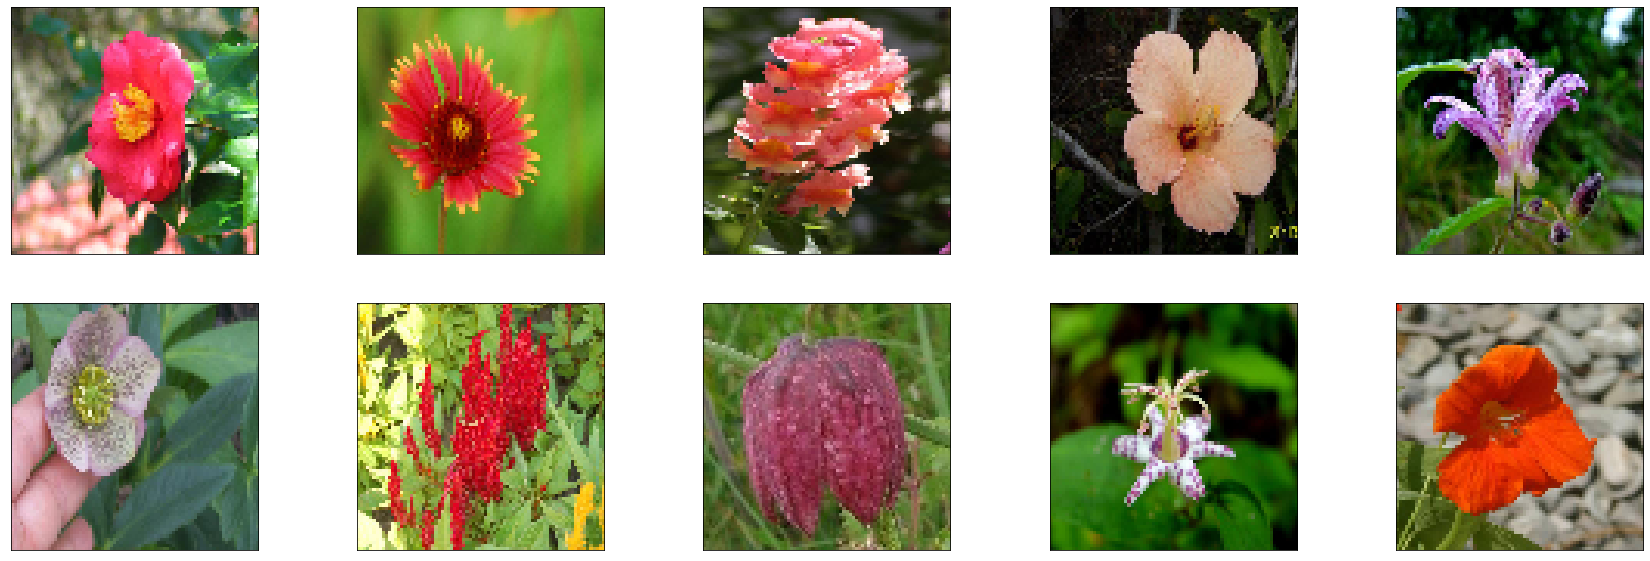

In [24]:
fig = plt.figure(figsize=(30, 10))
for i in range(10):
    random_num = np.random.randint(0, 6552)
    ax = fig.add_subplot(2, 5, i+1)
    plt.axis()
    plt.xticks([])
    plt.yticks([])
    #ax.set_xlabel(xlabel = training_labels[random_num], fontsize=15)
    ax.imshow(training_images[random_num])

In [25]:
validation_images = []
validation_labels = []
labels_idx = []

for label in os.listdir(Validation_dirc):
    images_for_label = os.path.join(Validation_dirc, label)
    for image in os.listdir(images_for_label):
        image = plt.imread(os.path.join(images_for_label, image))
        image = cv2.resize(image, (80, 80))
        validation_images.append(image)
        label_data = pd.DataFrame([label_map])
        validation_labels.append(label_data)
        labels_idx.append(label)
validation_images = np.array(validation_images)
validation_labels = np.array(validation_labels)
labels_idx = np.array(labels_idx, dtype='int32') 

validation_images.shape

(818, 80, 80, 3)

In [27]:
test_img = []
for img in os.listdir(Testing_dirc):
  test_img.append(img)
test_img = np.array(test_img)
test_img

array(['image_06021.jpg', 'image_00177.jpg', 'image_08108.jpg',
       'image_01903.jpg', 'image_02681.jpg', 'image_06670.jpg',
       'image_03855.jpg', 'image_00708.jpg', 'image_03624.jpg',
       'image_02583.jpg', 'image_03628.jpg', 'image_01777.jpg',
       'image_06374.jpg', 'image_03295.jpg', 'image_00526.jpg',
       'image_05971.jpg', 'image_05956.jpg', 'image_00092.jpg',
       'image_03547.jpg', 'image_08099.jpg', 'image_04417.jpg',
       'image_07536.jpg', 'image_02841.jpg', 'image_05711.jpg',
       'image_01307.jpg', 'image_04627.jpg', 'image_00740.jpg',
       'image_00029.jpg', 'image_01119.jpg', 'image_03538.jpg',
       'image_00814.jpg', 'image_07140.jpg', 'image_00394.jpg',
       'image_06197.jpg', 'image_01830.jpg', 'image_02978.jpg',
       'image_04671.jpg', 'image_03382.jpg', 'image_00970.jpg',
       'image_03269.jpg', 'image_01818.jpg', 'image_06248.jpg',
       'image_01856.jpg', 'image_07874.jpg', 'image_01276.jpg',
       'image_02433.jpg', 'image_00345.j

In [28]:
#labels_idx.shape
#training_images.shape
#training_labels.shape

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(training_images, training_labels, random_state=1,  shuffle=True,test_size=0.3)


In [30]:
tr_images = X_train/255.0
ts_images = X_test/255.0

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(6400,)),
    keras.layers.Dense(512, activation=tf.nn.sigmoid),
    keras.layers.Dense(512, activation=tf.nn.sigmoid),
    keras.layers.Dense(512, activation=tf.nn.sigmoid),
    keras.layers.Dense(102, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [31]:
history = model.fit(tr_images,y_train, validation_split = 0.1 , epochs=10)
test_loss , test_accuracy = model.evaluate(ts_images,y_test)
print("Test accuracy: ",test_accuracy)


Epoch 1/10


ValueError: ignored